# First explorations with one Qubit

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import Aer
from math import sqrt

## Hello Quantum World (Preparing a one Qubit System with an initial state)
We first instatiate a quantum circuit with only one qubit:

In [4]:
circuit = QuantumCircuit(1) # The parameter 1 indicates we are dealing with a one-qubit system

We now prepare the Qubit with the state vectors from the computaional basis in $\mathbb{C}^2$ ($\ket{0} := [1, 0]^T$ and $\ket{1} := [0, 1]^T$) and print the result:

In [6]:
for base_vector in ['0', '1']:
    state_vector = Statevector.from_label(base_vector)
    state_vector = state_vector.evolve(circuit)
    print(f'Qubit initialized with the state:', state_vector)

Qubit initialized with the state: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Qubit initialized with the state: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


We now repeat the process initialiazing the Qubit with the state vectors from the Hadamard basis in $\mathbb{C}^2$. (Here $\ket{+} := \dfrac{1}{\sqrt{2}}(\ket{0} + \ket{1})$ and $\ket{-} := \dfrac{1}{\sqrt{2}}(\ket{0} - \ket{1})$)

In [8]:
for base_vector in ['+', '-']:
    state_vector = Statevector.from_label(base_vector)
    state_vector = state_vector.evolve(circuit)
    print(f'Qubit initialized with the state:', state_vector)

Qubit initialized with the state: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Qubit initialized with the state: Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


## Measuring a One-Qubit System
We now instantiate a Quantum Circuit with one qubit and a classical bit to store the results of our measurements

In [10]:
circuit = QuantumCircuit(1, 1)

We prepare the Qubit with the state $\ket{0} = [1, 0]^T$

In [12]:
circuit.initialize([1,0], 0, 1)

We will now simulate the process of measuring this qubit 10000 times and print the results obtained:

In [14]:
# Measure the qubit and store the result in the classical bit
circuit.measure(0, 0)
print(circuit)
 # For local simulation
simulator = Aer.get_backend('qasm_simulator')
# Transpile and run the circuit
shots = 10000
t_qc = transpile(circuit, simulator)
job = simulator.run(t_qc, shots=shots)
result = job.result()
counts = result.get_counts()
print(counts)

     ┌─────────────────┐┌─┐
  q: ┤ Initialize(1,0) ├┤M├
     └─────────────────┘└╥┘
c: 1/════════════════════╩═
                         0 
{'0': 10000}


What happens if we repeat the process, this time preparing the Qubit with the sate $\ket{+} = \dfrac{1}{\sqrt{2}}(\ket{0} + \ket{1})$?

In [16]:
circuit = QuantumCircuit(1, 1)
circuit.initialize([1/sqrt(2), 1/sqrt(2)], 0, 1)
# Measure the qubit and store the result in the classical bit
circuit.measure(0, 0)
print(circuit)
 # For local simulation
simulator = Aer.get_backend('qasm_simulator')
# Transpile and run the circuit
shots = 10000
t_qc = transpile(circuit, simulator)
job = simulator.run(t_qc, shots=shots)
result = job.result()
counts = result.get_counts()
print(counts)

     ┌─────────────────────────────┐┌─┐
  q: ┤ Initialize(0.70711,0.70711) ├┤M├
     └─────────────────────────────┘└╥┘
c: 1/════════════════════════════════╩═
                                     0 
{'0': 5022, '1': 4978}


## Bloch Sphere Representations

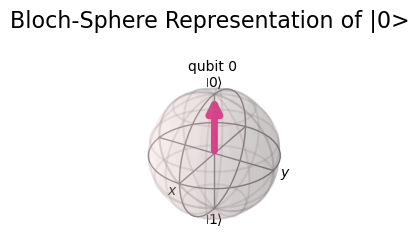

In [65]:
circuit = QuantumCircuit(1)
plot_bloch_multivector(circuit ,title="Bloch-Sphere Representation of |0>", figsize=(2,2))

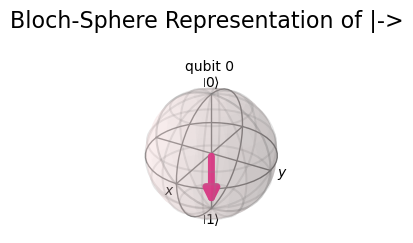

In [19]:
state_vector = Statevector.from_label('1')
circuit.initialize([0, 1], 0, 1)
plot_bloch_multivector(circuit ,title="Bloch-Sphere Representation of |->", figsize=(2,2))

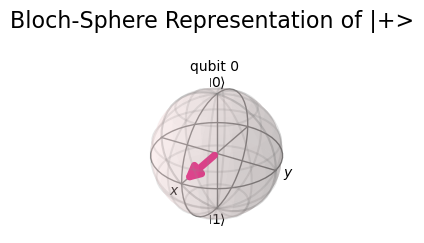

In [20]:
state_vector = Statevector.from_label('1')
circuit.initialize([1/sqrt(2), 1/sqrt(2)], 0, 1)
plot_bloch_multivector(circuit ,title="Bloch-Sphere Representation of |+>", figsize=(2,2))

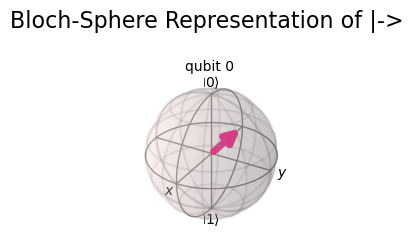

In [21]:
state_vector = Statevector.from_label('1')
circuit.initialize([1/sqrt(2), -1/sqrt(2)], 0, 1)
plot_bloch_multivector(circuit ,title="Bloch-Sphere Representation of |->", figsize=(2,2))